In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel('../data/StateEnl_2010_2020_Total.xlsx')

In [3]:
df.head()

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
0,Alabama,AL,32.318231,-86.902298,2010,2478,1.90,551,2.10,3029,1.90
1,Alaska,AK,63.588753,-154.493062,2010,342,0.26,70,0.27,412,0.26
2,Arizona,AZ,34.048928,-111.093731,2010,3264,2.50,576,2.20,3840,2.50
3,Arkansas,AR,35.201050,-91.831833,2010,1295,1.00,227,0.87,1522,1.00
4,California,CA,36.778261,-119.417932,2010,14559,11.20,2827,10.90,17386,11.10


In [4]:
df.tail()

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
556,Virginia,VA,37.431573,-78.656894,2020,4070,3.44,1010,3.59,5080,3.47
557,Washington,WA,47.751074,-120.740139,2020,2484,2.10,510,1.82,2994,2.04
558,West Virginia,WV,38.597626,-80.454903,2020,601,0.51,71,0.25,672,0.46
559,Wisconsin,WI,43.784440,-88.787868,2020,1686,1.42,292,1.04,1978,1.35
560,Wyoming,WY,43.075968,-107.290284,2020,234,0.20,54,0.19,288,0.20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                561 non-null    object 
 1   StateAbbr           561 non-null    object 
 2   lat                 561 non-null    float64
 3   long                561 non-null    float64
 4   Year                561 non-null    int64  
 5   DoD_Male            561 non-null    int64  
 6   DoD_Male_Percent    561 non-null    float64
 7   DoD_Female          561 non-null    int64  
 8   DoD_Female_Percent  561 non-null    float64
 9   DoD_Total           561 non-null    int64  
 10  DoD_Total_Percent   561 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 48.3+ KB


In [ ]:
#https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
#df = data.drop(['DoD_Male_Percent', 'DoD_Female_Percent', 'DoD_Total_Percent'], axis=1)
#df.head()

In [ ]:
#df = df.rename(columns = {'help':'DoD_Male_Percent', 'helpf':'DoD_Female_Percent', 'helpt':'DoD_Total_Percent'})

In [6]:
df.loc[df['Year'] == 2010]

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
0,Alabama,AL,32.318231,-86.902298,2010,2478,1.90,551,2.10,3029,1.90
1,Alaska,AK,63.588753,-154.493062,2010,342,0.26,70,0.27,412,0.26
2,Arizona,AZ,34.048928,-111.093731,2010,3264,2.50,576,2.20,3840,2.50
3,Arkansas,AR,35.201050,-91.831833,2010,1295,1.00,227,0.87,1522,1.00
4,California,CA,36.778261,-119.417932,2010,14559,11.20,2827,10.90,17386,11.10
5,Colorado,CO,39.550051,-105.782067,2010,2461,1.90,500,1.90,2961,1.90
6,Connecticut,CT,41.603221,-73.087749,2010,987,0.76,187,0.72,1174,0.75
7,Delaware,DE,38.910832,-75.527670,2010,302,0.23,79,0.30,381,0.24
8,District of Columbia,DC,38.905985,-77.033418,2010,83,0.06,19,0.07,102,0.07
9,Florida,FL,27.664827,-81.515754,2010,9421,7.20,2269,8.70,11690,7.50


In [7]:
df_2010 = df.loc[df['Year'] == 2010]
df_2010.tail(2)

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
49,Wisconsin,WI,43.784440,-88.787868,2010,2107,1.60,385,1.50,2492,1.60
50,Wyoming,WY,43.075968,-107.290284,2010,340,0.26,59,0.23,399,0.26


In [ ]:
#https://stackoverflow.com/questions/67235388/how-do-i-make-the-numbers-on-the-y-axis-show-values-in-millions-instead-of-in-sc
#fig,  = plt.subplots(figsize = (15,6))
#df_2010 = sns.barplot(x = 'Name', y = 'DoD_Total_Percent', data = df_2010, color = 'blue');
#df_2010.set_title('Percent Total New Enlisted by State 2010')
#df_2010.set_xticklabels(labels=df['State'], rotation=90)
#df_2010.set_ylabel('Percent Enlisted')
#df_2010.set_xlabel('State')
#plt.grid()
#plt.show()

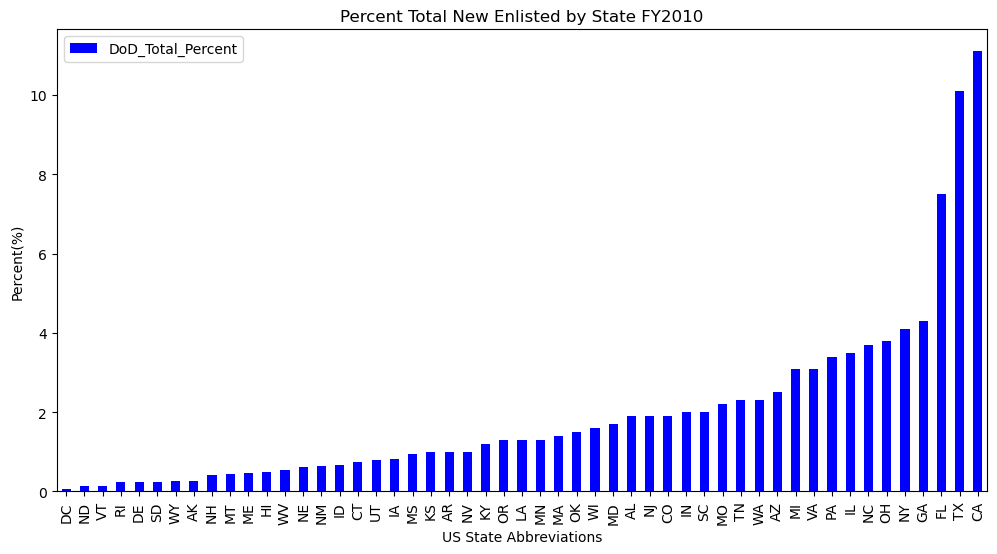

In [8]:
colors = ['blue']
df_2010 = pd.DataFrame(df_2010, columns=['StateAbbr', 'DoD_Total_Percent'])

df_2010.sort_values('DoD_Total_Percent', inplace=True)
df_2010.plot(x='StateAbbr', y=['DoD_Total_Percent'], kind = 'bar', color = colors, figsize = (12,6))
#plt.bar(color=colors)
plt.xticks(rotation = 90)
plt.xlabel('US State Abbreviations')
plt.ylabel('Percent(%)')
plt.title('Percent Total New Enlisted by State FY2010')
plt.show()         

In [9]:
df_2011 = df.loc[df['Year'] == 2011]
df_2011.tail(2)

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
100,Wisconsin,WI,43.784440,-88.787868,2011,2192,1.80,361,1.40,2553,1.70
101,Wyoming,WY,43.075968,-107.290284,2011,306,0.25,56,0.22,362,0.24


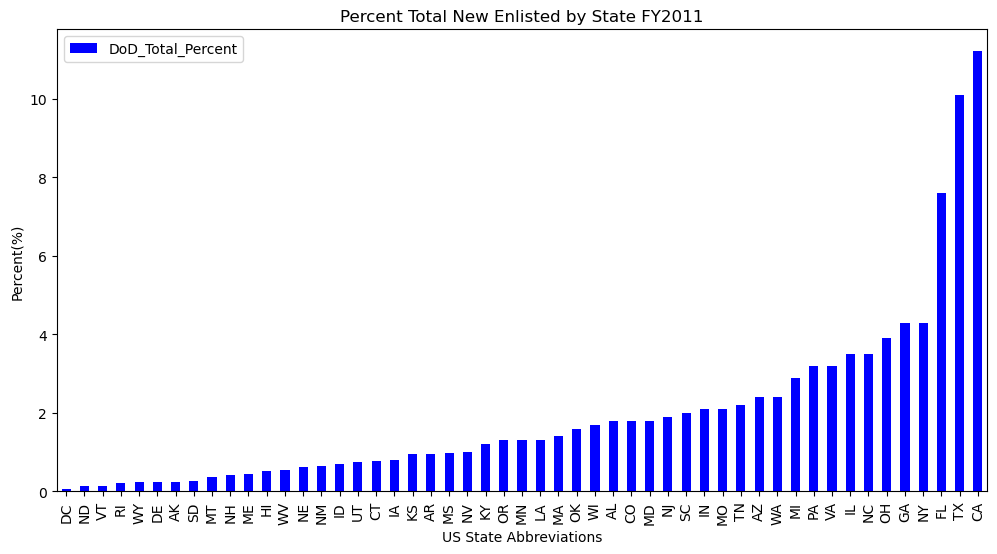

In [12]:
colors = ['blue']
df_2011 = pd.DataFrame(df_2011, columns=['StateAbbr', 'DoD_Total_Percent'])

df_2011.sort_values('DoD_Total_Percent', inplace=True)
df_2011.plot(x='StateAbbr', y=['DoD_Total_Percent'], kind = 'bar', color = colors, figsize = (12,6))
#plt.bar(color=colors)
#plt.update_layout(xaxis = {'StateAbbr':'total descending'})
plt.xticks(rotation = 90)
plt.xlabel('US State Abbreviations')
plt.ylabel('Percent(%)')
plt.title('Percent Total New Enlisted by State FY2011')
plt.show()     

In [13]:
df_2012 = df.loc[df['Year'] == 2012]
df_2012.tail(2)

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
151,Wisconsin,WI,43.784440,-88.787868,2012,2098,1.70,350,1.40,2448,1.60
152,Wyoming,WY,43.075968,-107.290284,2012,236,0.19,51,0.21,287,0.19


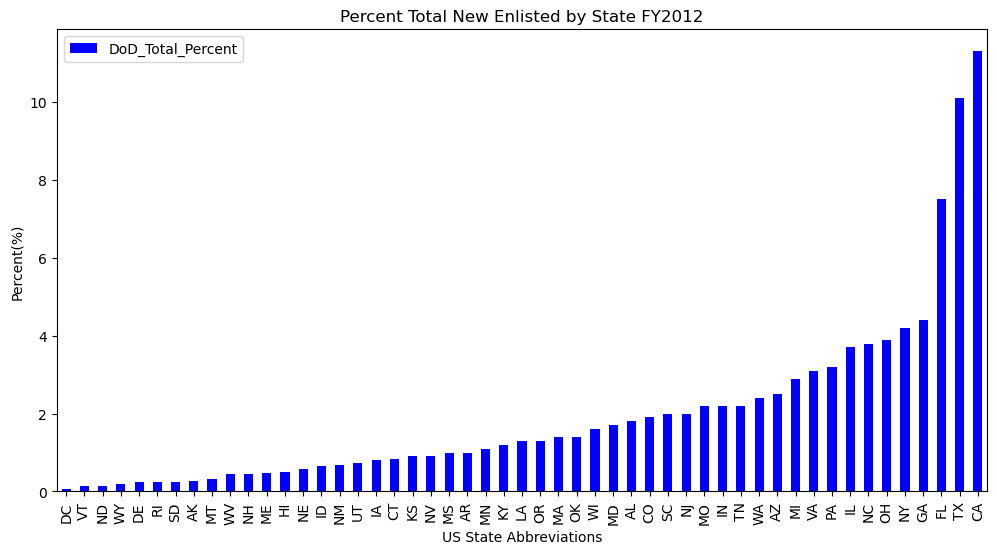

In [14]:
colors = ['blue']
df_2012 = pd.DataFrame(df_2012, columns=['StateAbbr', 'DoD_Total_Percent'])

df_2012.sort_values('DoD_Total_Percent', inplace=True)
df_2012.plot(x='StateAbbr', y=['DoD_Total_Percent'], kind = 'bar', color = colors, figsize = (12,6))
#plt.bar(color=colors)
#plt.update_layout(xaxis = {'StateAbbr':'total descending'})
plt.xticks(rotation = 90)
plt.xlabel('US State Abbreviations')
plt.ylabel('Percent(%)')
plt.title('Percent Total New Enlisted by State FY2012')
plt.show()    

In [15]:
df_2013 = df.loc[df['Year'] == 2013]
df_2013.tail(2)

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
202,Wisconsin,WI,43.784440,-88.787868,2013,2117,1.60,369,1.30,2486,1.50
203,Wyoming,WY,43.075968,-107.290284,2013,235,0.17,31,0.11,266,0.16


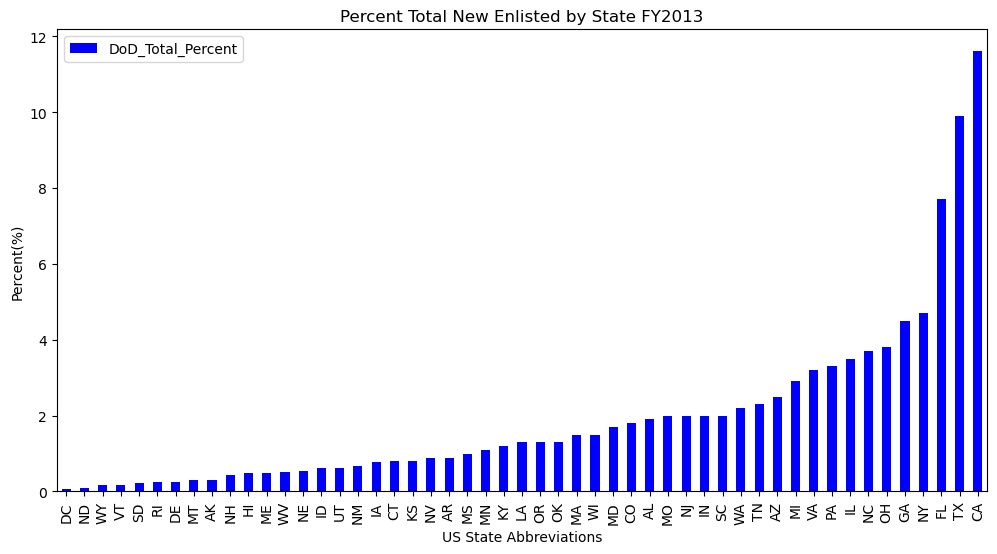

In [16]:
colors = ['blue']
df_2013 = pd.DataFrame(df_2013, columns=['StateAbbr', 'DoD_Total_Percent'])

df_2013.sort_values('DoD_Total_Percent', inplace=True)
df_2013.plot(x='StateAbbr', y=['DoD_Total_Percent'], kind = 'bar', color = colors, figsize = (12,6))
#plt.bar(color=colors)
#plt.update_layout(xaxis = {'StateAbbr':'total descending'})
plt.xticks(rotation = 90)
plt.xlabel('US State Abbreviations')
plt.ylabel('Percent(%)')
plt.title('Percent Total New Enlisted by State FY2013')
plt.show()    

In [17]:
df_2014 = df.loc[df['Year'] == 2014]
df_2014.tail(2)

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
253,Wisconsin,WI,43.784440,-88.787868,2014,1721,1.50,326,1.40,2047,1.50
254,Wyoming,WY,43.075968,-107.290284,2014,203,0.18,43,0.18,246,0.18


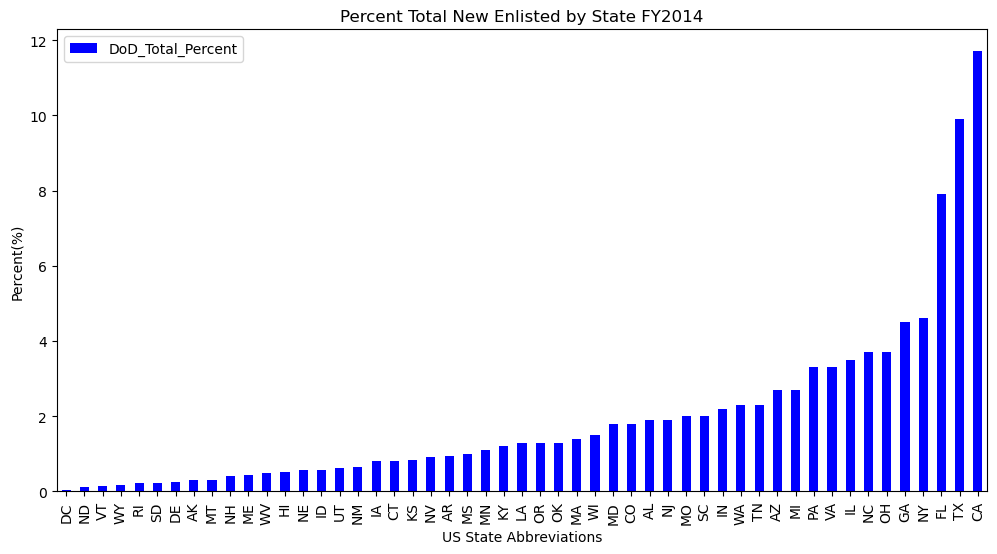

In [18]:
colors = ['blue']
df_2014 = pd.DataFrame(df_2014, columns=['StateAbbr', 'DoD_Total_Percent'])

df_2014.sort_values('DoD_Total_Percent', inplace=True)
df_2014.plot(x='StateAbbr', y=['DoD_Total_Percent'], kind = 'bar', color = colors, figsize = (12,6))
#plt.bar(color=colors)
#plt.update_layout(xaxis = {'StateAbbr':'total descending'})
plt.xticks(rotation = 90)
plt.xlabel('US State Abbreviations')
plt.ylabel('Percent(%)')
plt.title('Percent Total New Enlisted by State FY2014')
plt.show()    

In [19]:
df_2015 = df.loc[df['Year'] == 2015]
df_2015.tail(2)

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
304,Wisconsin,WI,43.784440,-88.787868,2015,1712,1.50,311,1.20,2023,1.40
305,Wyoming,WY,43.075968,-107.290284,2015,223,0.19,43,0.17,266,0.19


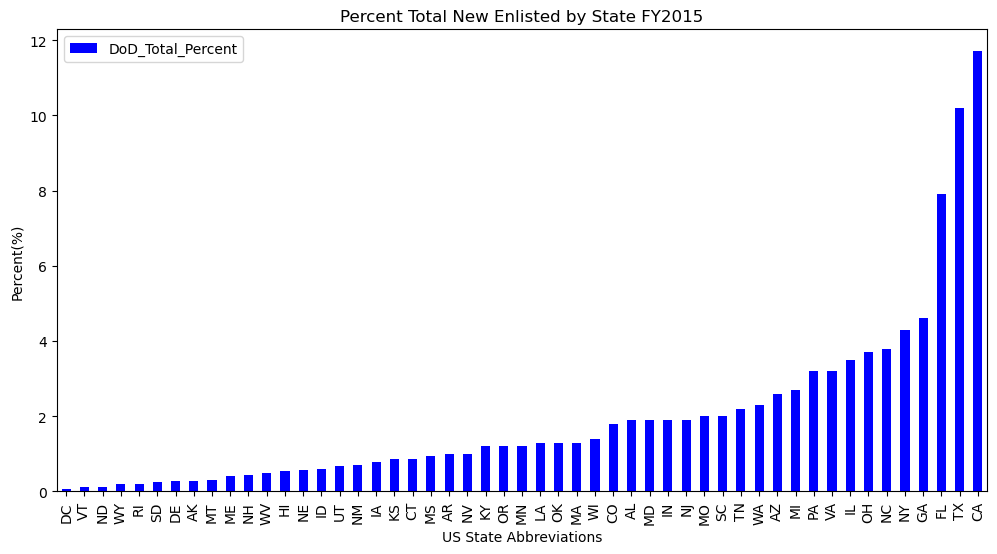

In [20]:
colors = ['blue']
df_2015 = pd.DataFrame(df_2015, columns=['StateAbbr', 'DoD_Total_Percent'])

df_2015.sort_values('DoD_Total_Percent', inplace=True)
df_2015.plot(x='StateAbbr', y=['DoD_Total_Percent'], kind = 'bar', color = colors, figsize = (12,6))
#plt.bar(color=colors)
#plt.update_layout(xaxis = {'StateAbbr':'total descending'})
plt.xticks(rotation = 90)
plt.xlabel('US State Abbreviations')
plt.ylabel('Percent(%)')
plt.title('Percent Total New Enlisted by State FY2015')
plt.show()    

In [21]:
df_2016 = df.loc[df['Year'] == 2016]
df_2016.tail(2)

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
355,Wisconsin,WI,43.784440,-88.787868,2016,1707,1.4,326,1.19,2033,1.36
356,Wyoming,WY,43.075968,-107.290284,2016,247,0.2,31,0.11,278,0.19


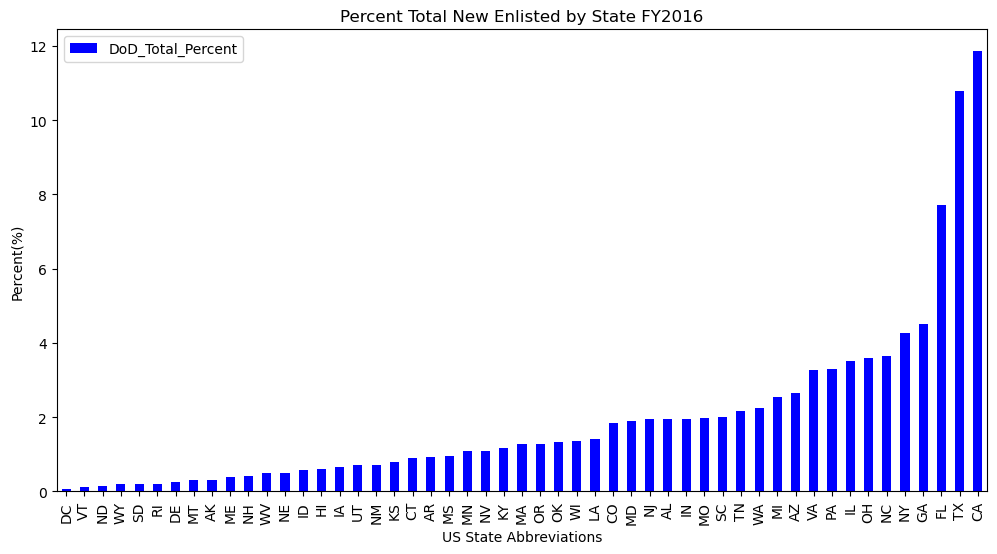

In [22]:
colors = ['blue']
df_2016 = pd.DataFrame(df_2016, columns=['StateAbbr', 'DoD_Total_Percent'])

df_2016.sort_values('DoD_Total_Percent', inplace=True)
df_2016.plot(x='StateAbbr', y=['DoD_Total_Percent'], kind = 'bar', color = colors, figsize = (12,6))
#plt.bar(color=colors)
#plt.update_layout(xaxis = {'StateAbbr':'total descending'})
plt.xticks(rotation = 90)
plt.xlabel('US State Abbreviations')
plt.ylabel('Percent(%)')
plt.title('Percent Total New Enlisted by State FY2016')
plt.show()    

In [23]:
df_2017 = df.loc[df['Year'] == 2017]
df_2017.tail(2)

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
406,Wisconsin,WI,43.784440,-88.787868,2017,1714,1.33,393,1.34,2107,1.34
407,Wyoming,WY,43.075968,-107.290284,2017,239,0.19,44,0.15,283,0.18


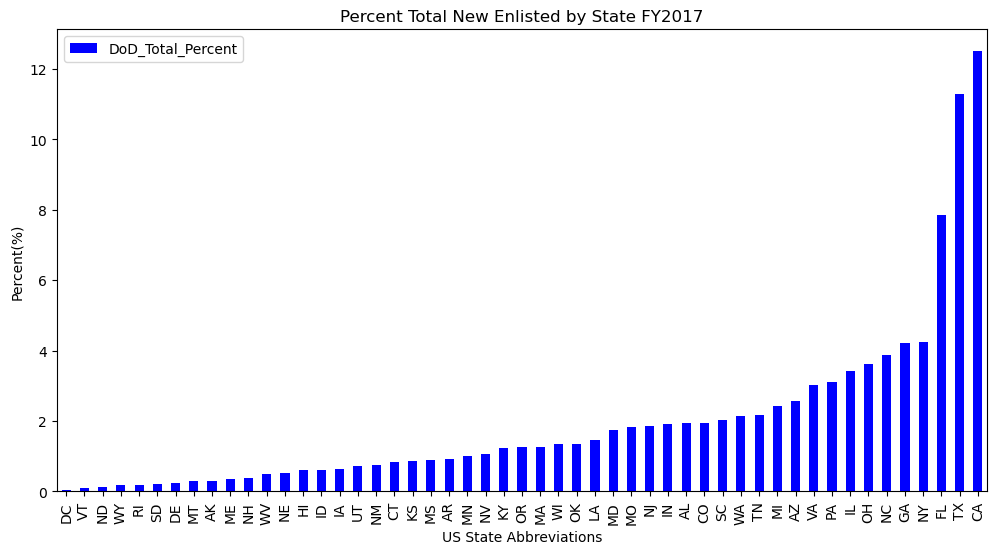

In [24]:
colors = ['blue']
df_2017 = pd.DataFrame(df_2017, columns=['StateAbbr', 'DoD_Total_Percent'])

df_2017.sort_values('DoD_Total_Percent', inplace=True)
df_2017.plot(x='StateAbbr', y=['DoD_Total_Percent'], kind = 'bar', color = colors, figsize = (12,6))
#plt.bar(color=colors)
#plt.update_layout(xaxis = {'StateAbbr':'total descending'})
plt.xticks(rotation = 90)
plt.xlabel('US State Abbreviations')
plt.ylabel('Percent(%)')
plt.title('Percent Total New Enlisted by State FY2017')
plt.show()    

In [25]:
df_2018 = df.loc[df['Year'] == 2018]
df_2018.tail(2)

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
457,Wisconsin,WI,43.784440,-88.787868,2018,1818,1.38,400,1.31,2218,1.37
458,Wyoming,WY,43.075968,-107.290284,2018,250,0.19,50,0.16,300,0.19


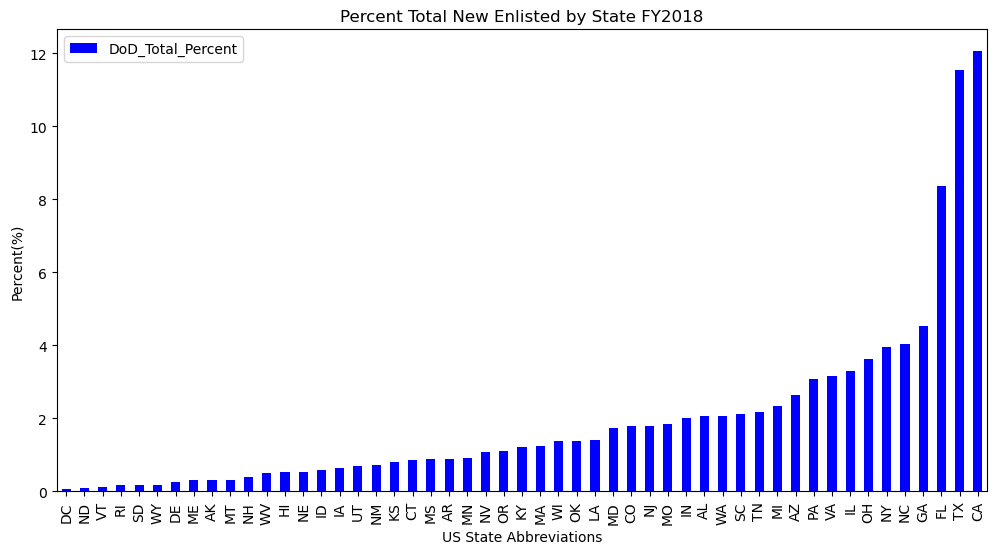

In [26]:
colors = ['blue']
df_2018 = pd.DataFrame(df_2018, columns=['StateAbbr', 'DoD_Total_Percent'])

df_2018.sort_values('DoD_Total_Percent', inplace=True)
df_2018.plot(x='StateAbbr', y=['DoD_Total_Percent'], kind = 'bar', color = colors, figsize = (12,6))
#plt.bar(color=colors)
#plt.update_layout(xaxis = {'StateAbbr':'total descending'})
plt.xticks(rotation = 90)
plt.xlabel('US State Abbreviations')
plt.ylabel('Percent(%)')
plt.title('Percent Total New Enlisted by State FY2018')
plt.show()    

In [27]:
df_2019 = df.loc[df['Year'] == 2019]
df_2019.tail(2)

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
508,Wisconsin,WI,43.784440,-88.787868,2019,1823,1.40,381,1.21,2204,1.36
509,Wyoming,WY,43.075968,-107.290284,2019,281,0.22,58,0.18,339,0.21


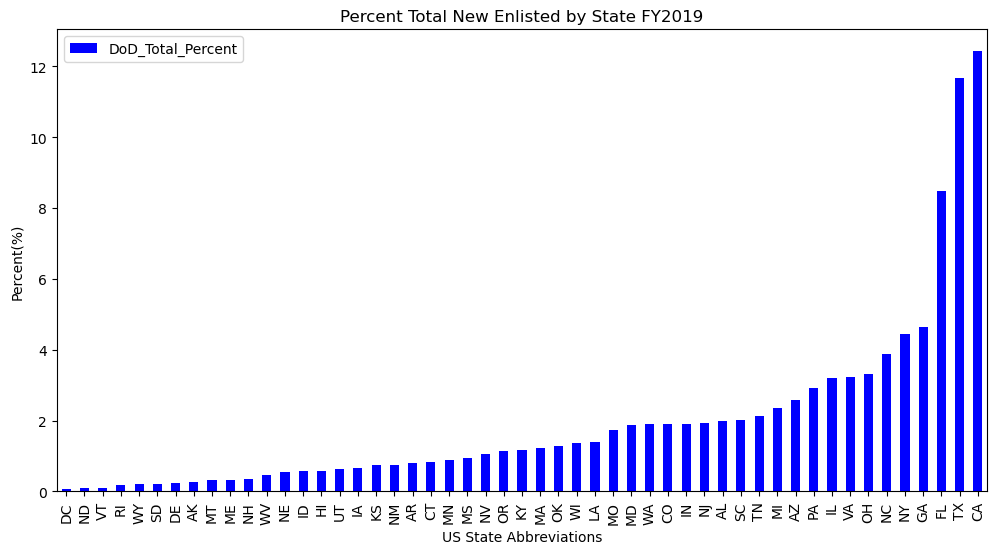

In [28]:
colors = ['blue']
df_2019 = pd.DataFrame(df_2019, columns=['StateAbbr', 'DoD_Total_Percent'])

df_2019.sort_values('DoD_Total_Percent', inplace=True)
df_2019.plot(x='StateAbbr', y=['DoD_Total_Percent'], kind = 'bar', color = colors, figsize = (12,6))
#plt.bar(color=colors)
#plt.update_layout(xaxis = {'StateAbbr':'total descending'})
plt.xticks(rotation = 90)
plt.xlabel('US State Abbreviations')
plt.ylabel('Percent(%)')
plt.title('Percent Total New Enlisted by State FY2019')
plt.show()    

In [29]:
df_2020 = df.loc[df['Year'] == 2020]
df_2020.tail(2)

,Name,StateAbbr,lat,long,Year,DoD_Male,DoD_Male_Percent,DoD_Female,DoD_Female_Percent,DoD_Total,DoD_Total_Percent
559,Wisconsin,WI,43.784440,-88.787868,2020,1686,1.42,292,1.04,1978,1.35
560,Wyoming,WY,43.075968,-107.290284,2020,234,0.20,54,0.19,288,0.20


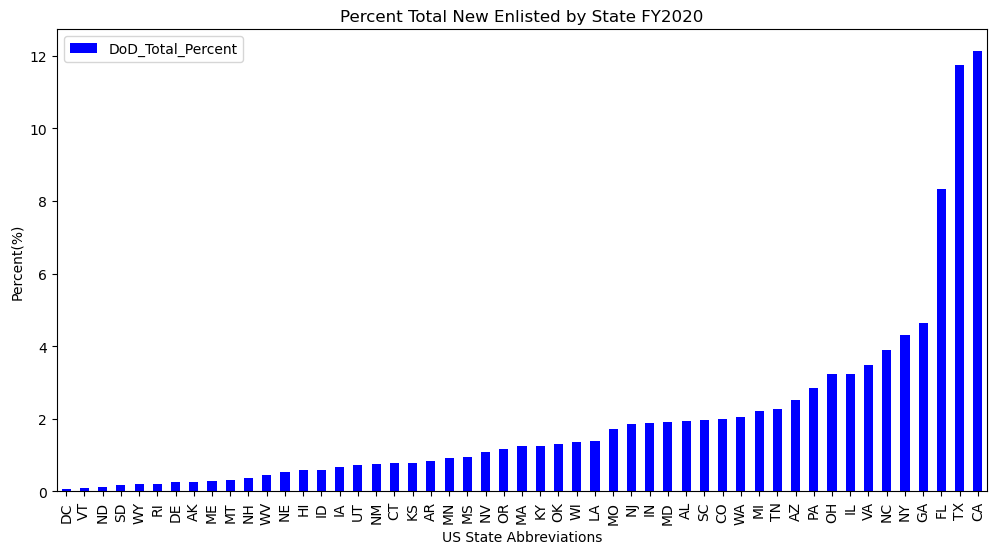

In [30]:
colors = ['blue']
df_2020 = pd.DataFrame(df_2020, columns=['StateAbbr', 'DoD_Total_Percent'])

df_2020.sort_values('DoD_Total_Percent', inplace=True)
df_2020.plot(x='StateAbbr', y=['DoD_Total_Percent'], kind = 'bar', color = colors, figsize = (12,6))
#plt.bar(color=colors)
#plt.update_layout(xaxis = {'StateAbbr':'total descending'})
plt.xticks(rotation = 90)
plt.xlabel('US State Abbreviations')
plt.ylabel('Percent(%)')
plt.title('Percent Total New Enlisted by State FY2020')
plt.show()    